In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
np.random.seed(1654)

In [2]:
df = pd.read_csv('poisson_regression_data.csv')
display(df.describe()) # it would not show up if i did not put display
display(df.head(10))

,x,y
count,101.000000,101.000000
mean,-0.011056,1.376238
std,0.797897,1.875375
min,-2.027651,0.000000
25%,-0.546820,0.000000
50%,-0.036527,1.000000
75%,0.513587,2.000000
max,1.919641,10.000000


,x,y
0,0.232466,3
1,-0.370613,1
2,0.929731,4
3,0.356606,1
4,0.387176,2
5,0.430502,2
6,0.894102,4
7,0.477324,2
8,-0.363227,0
9,-0.805599,0


In [3]:
def poissonNegLogLikelihood(Y, lam):
    lam = lam
    y = Y
    neg_log_like = -np.sum(y*np.log(lam) - lam )
           
    return neg_log_like


def poissonRegressionNegLogLikelihood(beta, X, y):
    mu = np.dot(X,beta)
    lam = np.exp(mu)
    neg_log_like = poissonNegLogLikelihood(y, lam)
    return neg_log_like


def modelPrediction(b,X):
    pred = np.exp(np.dot(X,b))
    return pred


def fitModel(X,y):
    nrows, ncols = X.shape
    betas = np.zeros((ncols))
    res = minimize(poissonRegressionNegLogLikelihood, betas, args=(X,y), method='Powell', tol=1e-8)
    return res


## Fit, Predict and Plot a Poisson Model 

[-0.1517036  1.2387846]


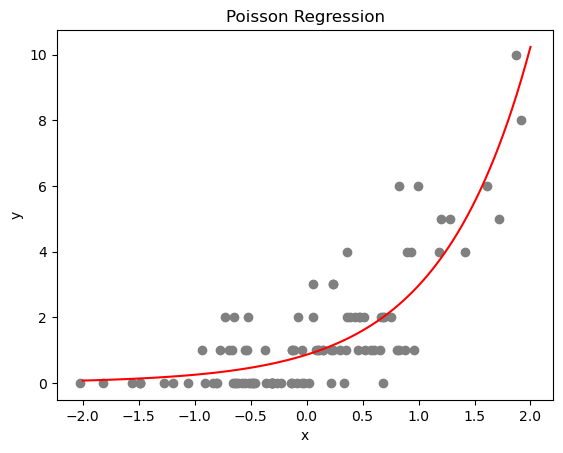

In [4]:
x = df['x'].values
N=x.size
X = np.c_[np.ones(N), x ] 

y = df['y'].values
res = fitModel(X, y)
b = res.x
print(b)
x_grid = np.linspace(-2, 2, 100) # get grid
Xn = np.c_[np.ones(x_grid.size), x_grid] # Make Design
yp=modelPrediction(b,Xn) # get prediction



plt.scatter(df['x'], df['y'], color = 'grey')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poisson Regression')
plt.plot(Xn[:,1], yp, color = 'red')
plt.show()